<a href="https://colab.research.google.com/github/nguyendao21/Project_Two_Team_Hodl/blob/main/rsi_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/mprudd2/Project_Two_Team_Hodl.git

Cloning into 'Project_Two_Team_Hodl'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
import pandas as pd
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
btc_df = pd.read_csv(
    Path("/content/Project_Two_Team_Hodl/Resources/Bitstamp_BTCUSD_d.csv"),
    index_col="date",
    infer_datetime_format=True,
    parse_dates=True
)



In [6]:
btc_df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-17,BTC/USD,41142.76,41187.60,40961.35,41049.85,8.817627,3.619623e+05
2022-03-16,BTC/USD,39302.80,41693.97,38865.67,41142.76,5987.103889,2.463260e+08
2022-03-15,BTC/USD,39688.55,39896.13,38142.35,39302.70,1638.684030,6.440471e+07
2022-03-14,BTC/USD,37763.37,39913.42,37567.19,39665.71,1439.767682,5.710941e+07
2022-03-13,BTC/USD,38798.68,39312.50,37595.62,37790.54,737.880132,2.788489e+07


In [7]:
btc_df["actual returns"] = btc_df["close"].pct_change()
btc_df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD,actual returns
date,,,,,,,,
2022-03-17,BTC/USD,41142.76,41187.60,40961.35,41049.85,8.817627,3.619623e+05,NaN
2022-03-16,BTC/USD,39302.80,41693.97,38865.67,41142.76,5987.103889,2.463260e+08,0.002263
2022-03-15,BTC/USD,39688.55,39896.13,38142.35,39302.70,1638.684030,6.440471e+07,-0.044724
2022-03-14,BTC/USD,37763.37,39913.42,37567.19,39665.71,1439.767682,5.710941e+07,0.009236
2022-03-13,BTC/USD,38798.68,39312.50,37595.62,37790.54,737.880132,2.788489e+07,-0.047274


In [8]:
btc_df = btc_df.dropna()

In [9]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

btc_df['rsi_14'] = get_rsi(btc_df['close'], 14)
btc_df = btc_df.dropna()
btc_df

,symbol,open,high,low,close,Volume BTC,Volume USD,actual returns,rsi_14
date,,,,,,,,,
2022-03-12,BTC/USD,38729.79,39458.58,38653.89,38822.02,9.628557e+02,37380001.92,0.027295,29.490963
2022-03-11,BTC/USD,39433.48,40237.22,38244.76,38729.79,2.063223e+03,79908207.13,-0.002376,28.862154
2022-03-10,BTC/USD,41952.13,42053.95,38545.19,39444.45,2.506235e+03,98857054.31,0.018452,39.607598
2022-03-09,BTC/USD,38761.13,42591.68,38667.65,41960.02,1.980294e+03,83093160.09,0.063775,61.596904
2022-03-08,BTC/USD,38002.23,39377.00,37885.05,38753.65,1.864905e+03,72271860.69,-0.076415,41.070240
...,...,...,...,...,...,...,...,...,...
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6832.53,0.006849,69.684687
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6660.56,-0.002268,69.036895
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3046.33,-0.013346,65.203802


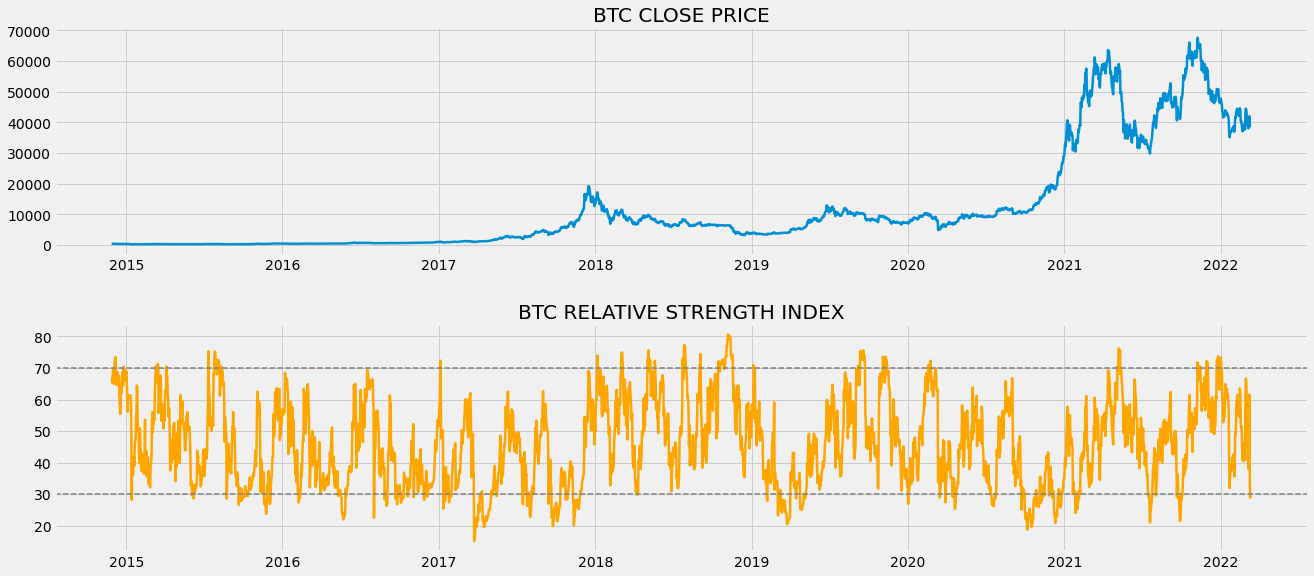

In [10]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(btc_df['close'], linewidth = 2.5)
ax1.set_title('BTC CLOSE PRICE')
ax2.plot(btc_df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('BTC RELATIVE STRENGTH INDEX')
plt.show()

In [32]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(btc_df['close'], btc_df['rsi_14'])

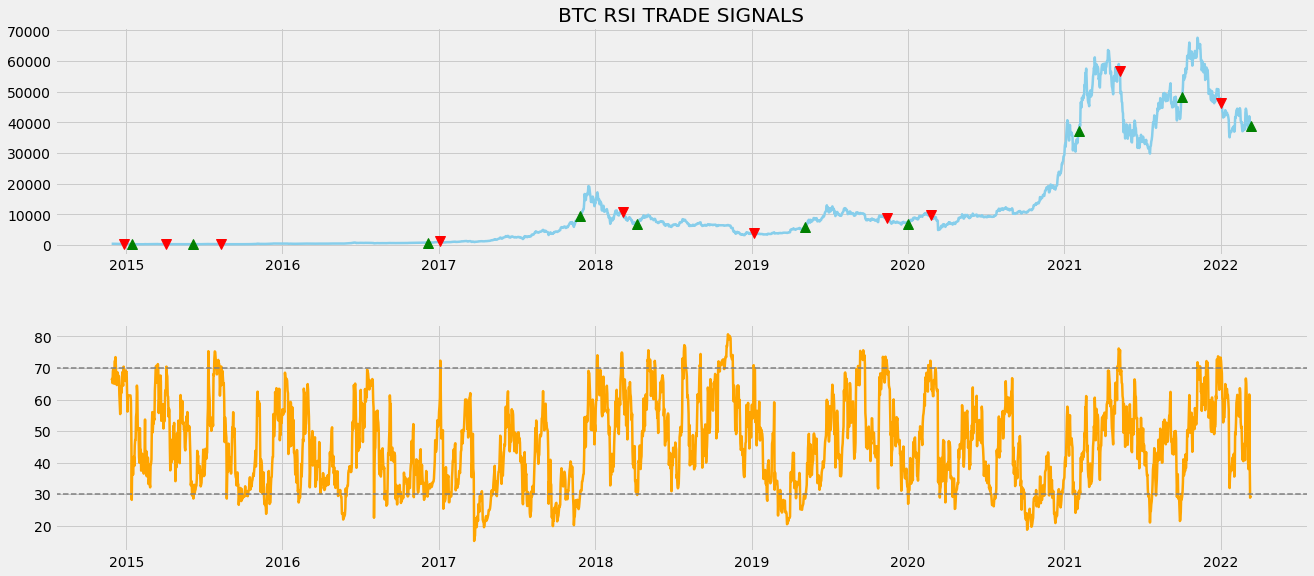

In [33]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(btc_df['close'], linewidth = 2.5, color = 'skyblue', label = 'BTC')
ax1.plot(btc_df.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(btc_df.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('BTC RSI TRADE SIGNALS')
ax2.plot(btc_df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

In [34]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(btc_df['close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
rsi = btc_df['rsi_14']
close_price = btc_df['close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(btc_df.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(btc_df.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()

,close,rsi_14,rsi_signal,rsi_position
date,,,,
2022-03-12,38822.02,29.490963,1,1
2022-03-11,38729.79,28.862154,0,1
2022-03-10,39444.45,39.607598,0,1
2022-03-09,41960.02,61.596904,0,1
2022-03-08,38753.65,41.070240,0,1


In [35]:
btc_ret = pd.DataFrame(np.diff(btc_df['close'])).rename(columns = {0:'returns'})
rsi_strategy_ret = []

for i in range(len(btc_ret)):
    returns = btc_ret['returns'][i]*strategy['rsi_position'][i]
    rsi_strategy_ret.append(returns)
    
rsi_strategy_ret_df = pd.DataFrame(rsi_strategy_ret).rename(columns = {0:'rsi_returns'})
investment_value = 5000
number_of_stocks = floor(investment_value/btc_df['close'][-1])
rsi_investment_ret = []

for i in range(len(rsi_strategy_ret_df['rsi_returns'])):
    returns = number_of_stocks*rsi_strategy_ret_df['rsi_returns'][i]
    rsi_investment_ret.append(returns)

rsi_investment_ret_df = pd.DataFrame(rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the RSI strategy by investing $100k in BTC : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the RSI strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the RSI strategy by investing $100k in BTC : -204111.83
Profit percentage of the RSI strategy : -4083%
